In [30]:
%matplotlib inline
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 9,
   'ytick.labelsize': 9,
   'text.usetex': True,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

target = 'paper'
if target == 'beamer':
    col_width = 307.28987 #pt
else:
    col_width = 418.25555 #pt
    
# https://stackoverflow.com/a/31527287
def get_figsize(columnwidth=col_width, wf=0.5, hf=(5.**0.5-1.0)/2.0, ):
    """Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - columnwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return [fig_width, fig_height]

In [51]:
df = pd.read_csv('../../results/times.csv')
df = df.loc[df['img_size'] != 1536]

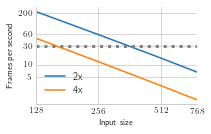

In [60]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=get_figsize(col_width, wf=0.5))

dff = df.loc[(df['model'] == 'lap_srn') & (df['num_outputs'] == 1),:]
x = dff['img_size'].values
y = 1000/dff['time'].values
ax.loglog(x,y, label='2x')

dff = df.loc[(df['model'] == 'lap_srn') & (df['num_outputs'] == 2),:]
x = dff['img_size'].values
y = 1000/dff['time'].values

ax.loglog(x,y, label='4x')

ax.minorticks_off()
ax.set_xlim((128,768))
#ax.set_ylim(bottom=0.9)
ax.set_xticks(x)

ax.set_yticks([200, 60, 30, 10, 5])
#ax.set_xticklabels([str(i) for i in x])

ax.set_xlabel('Input size')
ax.set_ylabel('Frames per second')

ax.legend(loc='lower left')

ax.axhline(30, c='gray', linestyle='dotted', linewidth=3)
#ax.axhline(60, c='gray', linestyle='dotted')

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    s = ScalarFormatter()
    #s.set_powerlimits((-3, 5))
    s.set_scientific(True)
    axis.set_major_formatter(ScalarFormatter())
sns.despine(fig, ax)

fig.savefig('../../figures/time_upscaling_{}.pdf'.format(target),bbox_inches='tight', transparent=True)

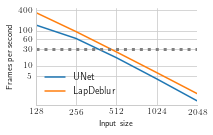

In [59]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=get_figsize(col_width, wf=0.5))

dff = df.loc[df['model'] == 'unet',:]
x = dff['img_size'].values
y = 1000/dff['time'].values
ax.loglog(x,y, label='UNet')

dff = df.loc[(df['model'] == 'lap_deblur') & (df['num_outputs'] == 2),:]
x = dff['img_size'].values
y = 1000/dff['time'].values
ax.loglog(x,y, label='LapDeblur')

ax.minorticks_off()
ax.set_xlim((128,768))
ax.set_xticks(x)

ax.set_yticks([400, 100, 60, 30, 10, 5])
#ax.set_xticklabels([str(i) for i in x])

ax.set_xlabel('Input size')
ax.set_ylabel('Frames per second')

ax.legend(loc='lower left')

ax.axhline(30, c='gray', linestyle='dotted', linewidth=3)
#ax.axhline(60, c='gray', linestyle='dotted')

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    s = ScalarFormatter()
    #s.set_powerlimits((-3, 5))
    s.set_scientific(True)
    axis.set_major_formatter(ScalarFormatter())
sns.despine(fig, ax)

fig.savefig('../../figures/time_denoising_{}.pdf'.format(target), bbox_inches='tight', transparent=True)

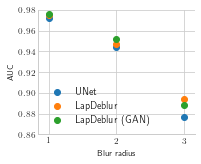

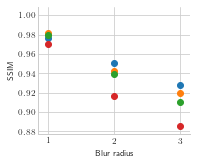

In [122]:
df = pd.read_csv('../results_denoise.csv')
df = df.groupby(['model_name', 'blur_strength']).mean()

if target == 'beamer':
    wf, hf = 1, 0.6
else:
    wf, hf = 0.45, 0.8

fig, ax = plt.subplots(1,1, figsize=get_figsize(col_width, wf=wf, hf=hf))

#ax.plot(blur_radii, roc_blurred, label='Blurred')
blur_radii = [1,2,3]
roc_blurred = [0.9587807708947478,0.8293786076015828,0.6544241695755042]
roc_unet = [0.972288834008955, 0.9437333865022609, 0.8764693884960465]
roc_nogan = [0.9751542759013254, 0.9469462110832834, 0.8936708286159896]
roc_gan = [0.9763291601942231, 0.9514844050774692, 0.8878685950815753]
ax.scatter(blur_radii, roc_unet, label='UNet')
ax.scatter(blur_radii, roc_nogan, label='LapDeblur')
ax.scatter(blur_radii, roc_gan, label='LapDeblur (GAN)')
ax.legend(loc='lower left')
ax.set_ylabel('AUC')
ax.set_ylim(0.86, 0.98)
ax.minorticks_off()
ax.set_xticks([1,2,3])
ax.set_xlabel('Blur radius')
ax.legend(loc='lower left')
sns.despine(fig, ax)
fig.tight_layout(pad=0)
fig.savefig('../../figures/deblur_auc_{}.pdf'.format(target), transparent=True)

fig, ax = plt.subplots(1,1, figsize=get_figsize(col_width, wf=wf, hf=hf))
ssims = df['ssim_sr']
ax.scatter(blur_radii, ssims['unet'], label='UNet')
ax.scatter(blur_radii, ssims['nogan'], label='Lap')
ax.scatter(blur_radii, ssims['gan'], label='Lap (GAN)')
ax.scatter(blur_radii, df['ssim_bic']['unet'], label='Blurred')

ax.minorticks_off()
ax.set_xticks([1,2,3])
#ax.set_xlim(right=3.5)
ax.set_ylabel('SSIM')
ax.set_xlabel('Blur radius')
if target == 'paper':
    #legend = fig.legend(loc='upper right', bbox_to_anchor=(1.05,0.9), frameon=True)
    #legend.get_frame().set_facecolor('white')
    #legend = ax.legend(loc='upper right', frameon=True)
    #legend.get_frame().set_facecolor('white')
    pass
else:
    ax.legend(loc='upper right')
sns.despine(fig, ax)
fig.tight_layout(pad=0)
fig.savefig('../../figures/deblur_ssim_{}.pdf'.format(target), transparent=True)

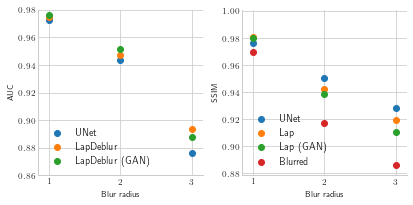

In [135]:
df = pd.read_csv('../results_denoise.csv')
df = df.groupby(['model_name', 'blur_strength']).mean()

if target == 'beamer':
    wf, hf = 1, 0.6
else:
    wf, hf = 1., 0.5

fig, axs = plt.subplots(1,2, figsize=get_figsize(col_width, wf=wf, hf=hf))

#ax.plot(blur_radii, roc_blurred, label='Blurred')
blur_radii = [1,2,3]
roc_blurred = [0.9587807708947478,0.8293786076015828,0.6544241695755042]
roc_unet = [0.972288834008955, 0.9437333865022609, 0.8764693884960465]
roc_nogan = [0.9751542759013254, 0.9469462110832834, 0.8936708286159896]
roc_gan = [0.9763291601942231, 0.9514844050774692, 0.8878685950815753]
axs[0].scatter(blur_radii, roc_unet, label='UNet')
axs[0].scatter(blur_radii, roc_nogan, label='LapDeblur')
axs[0].scatter(blur_radii, roc_gan, label='LapDeblur (GAN)')
axs[0].legend(loc='lower left')
axs[0].set_ylabel('AUC')
axs[0].set_ylim(0.86, 0.98)
axs[0].minorticks_off()
axs[0].set_xticks([1,2,3])
axs[0].set_xlabel('Blur radius')
axs[0].legend(loc='lower left')
sns.despine(fig, axs[0])
#fig.savefig('../../figures/deblur_auc_{}.pdf'.format(target), transparent=True)

#fig, ax = plt.subplots(1,1, figsize=get_figsize(col_width, wf=wf, hf=hf))
#ssims = df['ssim_sr']
axs[1].scatter(blur_radii, ssims['unet'], label='UNet')
axs[1].scatter(blur_radii, ssims['nogan'], label='Lap')
axs[1].scatter(blur_radii, ssims['gan'], label='Lap (GAN)')
axs[1].scatter(blur_radii, df['ssim_bic']['unet'], label='Blurred')

axs[1].minorticks_off()
axs[1].set_xticks([1,2,3])
#ax.set_xlim(right=3.5)
axs[1].set_ylabel('SSIM')
axs[1].set_xlabel('Blur radius')
legend = axs[1].legend(loc='lower left', frameon=False)
sns.despine(fig, axs[1])
fig.tight_layout()
#fig.savefig('../../figures/deblur_ssim_{}.pdf'.format(target), transparent=True)

fig.savefig('../../figures/deblur_complete_{}.pdf'.format(target), transparent=True)